In [1]:
from google.colab import files
data=files.upload()

Saving titanic.csv to titanic.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("titanic.csv")

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
#finding the columns have null values
null_column=df.columns[df.isnull().any()].tolist()
null_column

['Age', 'Cabin', 'Embarked']

In [15]:
print("Missing values in each columns are-")
df.isna().sum()

Missing values in each columns are-


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


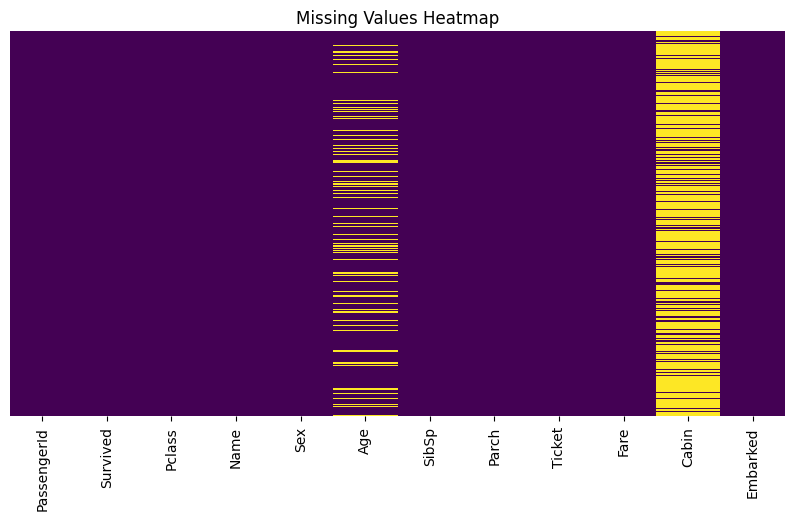

In [17]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

In [18]:
from sklearn.experimental import enable_iterative_imputer as ei
from sklearn.impute import IterativeImputer as im
from sklearn.ensemble import RandomForestRegressor as rr

In [19]:
df1=df.copy()

In [20]:
numerical_cols=df1.select_dtypes(include=np.number).columns
categorical_cols=df1.select_dtypes(exclude=np.number).columns

imputer_num = im(estimator=rr(), random_state=0)
df1[numerical_cols] = imputer_num.fit_transform(df1[numerical_cols])
for col in categorical_cols:
    df1[col] = df1[col].fillna(df1[col].mode()[0])

/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [22]:
df1.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0



Survival Count:
 Survived
0.0    549
1.0    342
Name: count, dtype: int64


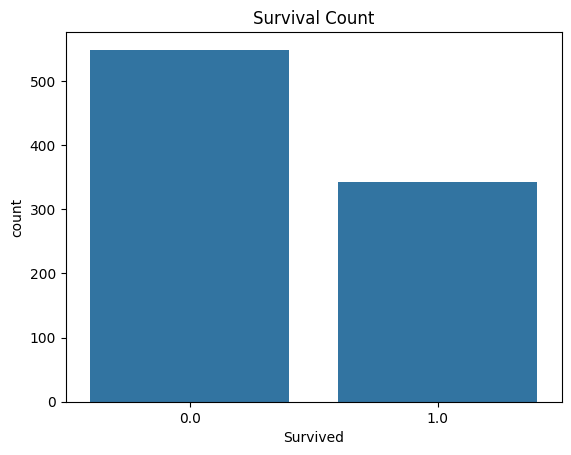

In [23]:
print("\nSurvival Count:\n", df1['Survived'].value_counts())
sns.countplot(x='Survived', data=df1)
plt.title('Survival Count')
plt.show()


Pclass Distribution:
 Pclass
3.0    491
1.0    216
2.0    184
Name: count, dtype: int64


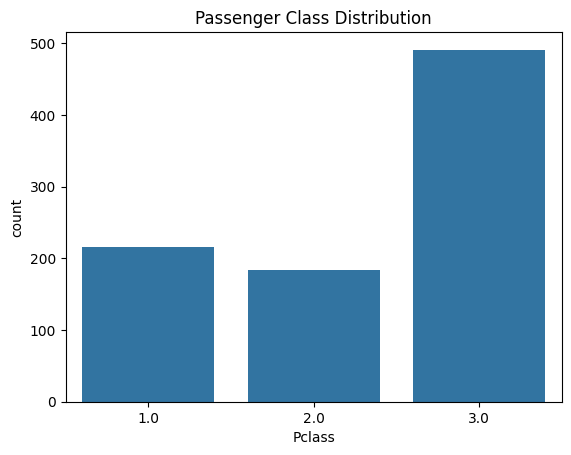

In [24]:
print("\nPclass Distribution:\n", df1['Pclass'].value_counts())
sns.countplot(x='Pclass', data=df1)
plt.title('Passenger Class Distribution')
plt.show()


Age Statistics:
 count    891.000000
mean      29.631748
std       13.708949
min        0.420000
25%       21.000000
50%       28.460000
75%       37.000000
max       80.000000
Name: Age, dtype: float64


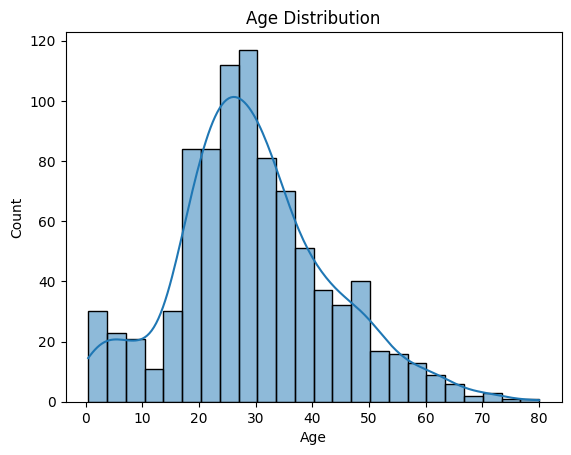

In [26]:
print("\nAge Statistics:\n", df1['Age'].describe())
sns.histplot(x='Age', data=df1, kde=True)
plt.title('Age Distribution')
plt.show()


Sex Distribution:
 Sex
male      577
female    314
Name: count, dtype: int64


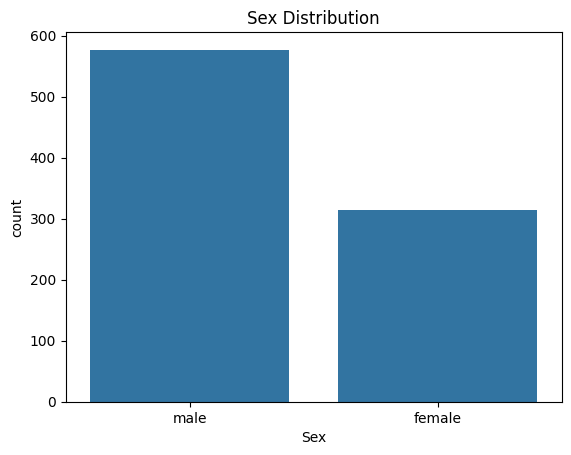

In [28]:
print("\nSex Distribution:\n", df1['Sex'].value_counts())
sns.countplot(x='Sex', data=df1)
plt.title('Sex Distribution')
plt.show()

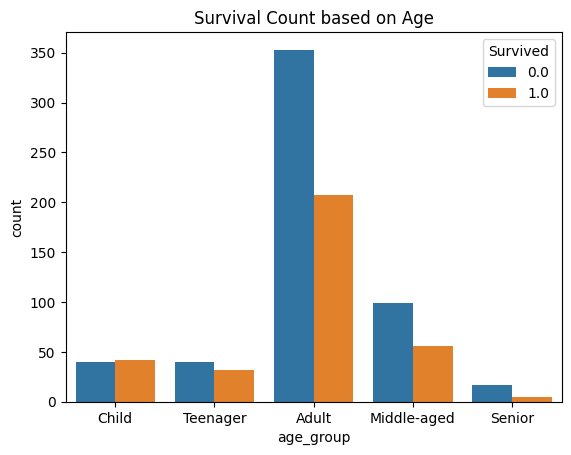

In [30]:
# Visualization of survivals based on different age groups, Pclass, Sex

#based on age groups
bins = [0, 12, 18, 40, 60, 80]
labels = ['Child', 'Teenager', 'Adult', 'Middle-aged', 'Senior']
df1['age_group'] = pd.cut(df1['Age'], bins=bins, labels=labels)
sns.countplot(x='age_group', hue='Survived', data=df1)
plt.title('Survival Count based on Age')
plt.show()

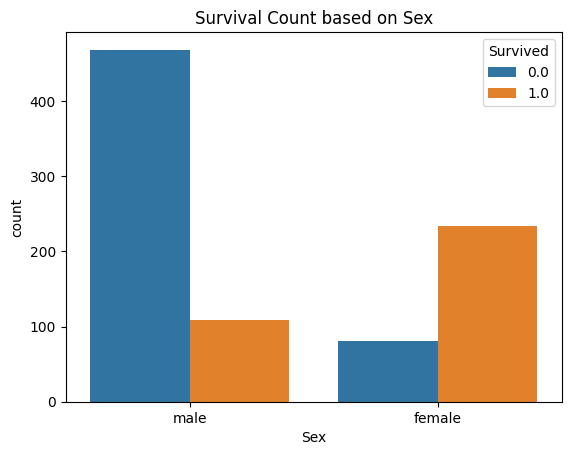

In [31]:
# based on Sex
sns.countplot(x='Sex', hue='Survived', data=df1)
plt.title('Survival Count based on Sex')
plt.show()

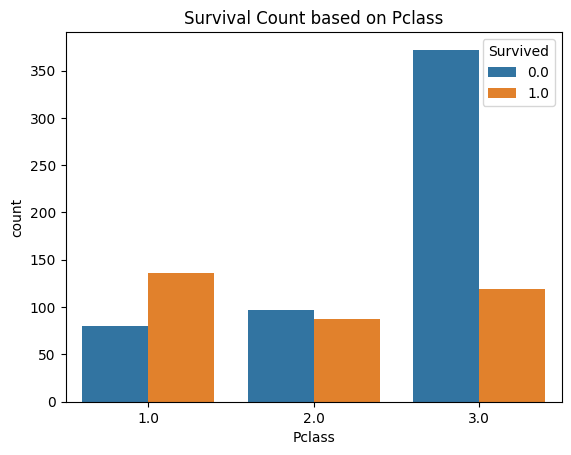

In [32]:
#based on Pclass
sns.countplot(x='Pclass', hue='Survived', data=df1)
plt.title('Survival Count based on Pclass')
plt.show()

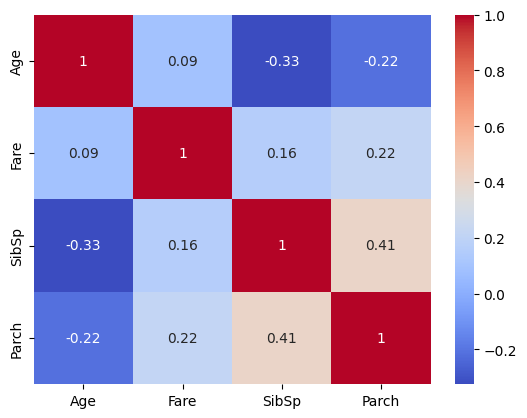

In [35]:
#finding the correlation coefficient
correlation_matrix = df1[['Age', 'Fare', 'SibSp', 'Parch']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [33]:
# Bayesian stastics
p_survived = df1['Survived'].mean()
p_female = (df1['Sex'] == 'female').mean()
p_female_given_survived = df1[df1['Survived'] == 1]['Sex'].value_counts(normalize=True)['female']

bayes_prob = (p_female_given_survived * p_survived) / p_female
print(f"Bayesian P(Survived | Female): {bayes_prob}")


Bayesian P(Survived | Female): 0.7420382165605095
